## Reflexión – Selección de datos

Para este análisis se ha seleccionado el archivo `wine.csv`, que contiene información química sobre distintos tipos de vino.

La variable objetivo elegida ha sido **`Alcohol`**, ya que representa un valor continuo y es interesante desde el punto de vista enológico, siendo además útil para clasificación o control de calidad del producto.

Las variables predictoras consideradas son todas las demás columnas numéricas del dataset, como:
- `Malic_Acid`, `Ash`, `Alcalinity_of_Ash`, `Magnesium`, `Total_phenols`, `Flavanoids`, entre otras.

Estas variables se han mantenido para el análisis porque representan características químicas que **podrían influir directamente en el contenido de alcohol del vino**. La hipótesis es que algunas de estas características podrían tener una relación lineal significativa con el contenido alcohólico.


## Selección de datos

In [3]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv("wine.csv")

# Mostrar primeras filas
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Revisar columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Preprocesamiento de datos

In [6]:
# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar valores nulos (no hay muchos en este dataset)
df = df.dropna()

# Asegurar que 'Alcohol' es numérico
df['Alcohol'] = pd.to_numeric(df['Alcohol'], errors='coerce')

## Transformación de datos

In [8]:
# Eliminar la columna 'Wine' si no será usada como predictor
df = df.drop(columns=['Wine'], errors='ignore')

# Estadísticas descriptivas
df.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 4. Minerias de datos - Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Definir variable objetivo y variables predictoras
X = df.drop(columns=['Alcohol'])
y = df['Alcohol']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"Error medio cuadrado (MSE): {mse:.4f}")

R²: 0.6242
Error medio cuadrado (MSE): 0.2018


## 5. Interpretación de resultados

In [12]:
# Coeficientes del modelo
coef = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

# Mostrar fórmula
print("Fórmula del modelo lineal:")
print(f"Alcohol = {intercept:.3f} + " + " + ".join([f"{c:.3f}*{v}" for v, c in coef.items()]))

Fórmula del modelo lineal:
Alcohol = 11.159 + 0.139*Malic.acid + 0.197*Ash + -0.041*Acl + -0.003*Mg + -0.008*Phenols + 0.077*Flavanoids + -0.208*Nonflavanoid.phenols + -0.154*Proanth + 0.160*Color.int + 0.419*Hue + 0.077*OD + 0.001*Proline


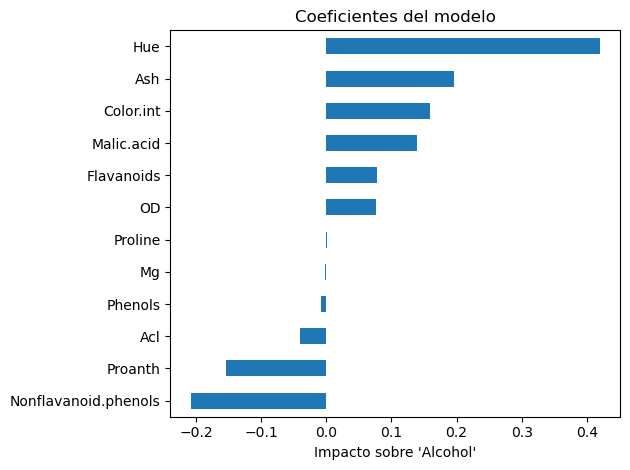

In [13]:
# Visualizar la influencia de las variables
import matplotlib.pyplot as plt

coef.sort_values().plot(kind='barh', title="Coeficientes del modelo")
plt.xlabel("Impacto sobre 'Alcohol'")
plt.tight_layout()
plt.show()

## Reflexión – Interpretación de resultados

Tras entrenar el modelo de regresión lineal, se ha obtenido una fórmula con varios coeficientes asociados a cada variable predictora - Alcohol = 11.159 + 0.139*Malic.acid + 0.197*Ash + -0.041*Acl + -0.003*Mg + -0.008*Phenols + 0.077*Flavanoids + -0.208*Nonflavanoid.phenols + -0.154*Proanth + 0.160*Color.int + 0.419*Hue + 0.077*OD + 0.001*Proline

### Coeficientes:
Los coeficientes indican la influencia que cada variable tiene sobre el valor de `Alcohol`. Por ejemplo:
- Un coeficiente positivo implica que al aumentar esa variable, el contenido de alcohol tiende a aumentar.
- Un coeficiente negativo implica que al aumentar esa variable, el contenido de alcohol tiende a disminuir.

### Evaluación del modelo

- **R² = 0.6242**: esto indica que aproximadamente el **62.4% de la variabilidad** en el contenido de alcohol puede explicarse por las variables predictoras seleccionadas. No es un ajuste perfecto, pero **sí sugiere una relación moderadamente fuerte** entre las características químicas del vino y su contenido alcohólico.
  
- **MSE = 0.2018**: el error medio cuadrado indica que, en promedio, la diferencia al cuadrado entre los valores reales y predichos del contenido de alcohol es relativamente baja. Esto refuerza que el modelo tiene un rendimiento **razonable**.

### Interpretación

- El modelo logra capturar patrones generales entre las variables químicas y el contenido de alcohol, aunque hay todavía un margen de error significativo.
- Algunas variables químicas podrían no tener una relación estrictamente lineal con el alcohol o estar influidas por factores externos no incluidos en el dataset.
- Puede ser útil explorar modelos más complejos (como regresión polinómica o modelos no lineales) si se busca un ajuste más preciso.

### Conclusión

Aunque no es un modelo perfecto, **sí proporciona una base útil para predecir el contenido de alcohol en vinos a partir de características químicas**. El valor de R² sugiere que hay una tendencia significativa en los datos, lo cual es valioso en un contexto exploratorio o industrial.
